In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

series = pd.read_csv(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\18. Forecasting\PlasticSales.csv',
                    index_col = 0)
series

,Sales
Month,
Jan-49,742
Feb-49,697
Mar-49,776
Apr-49,898
May-49,1030
Jun-49,1107
Jul-49,1165
Aug-49,1216
Sep-49,1208


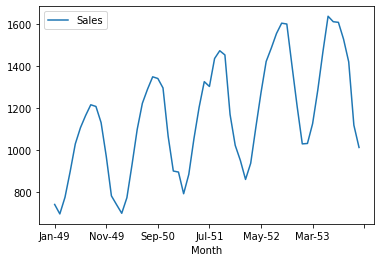

In [3]:
import matplotlib.pyplot as plt
series.plot()
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

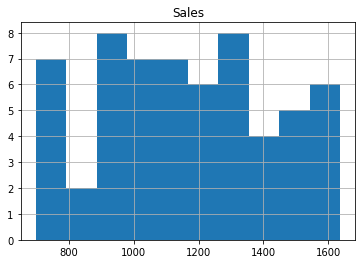

In [4]:
series.hist()

<AxesSubplot:ylabel='Density'>

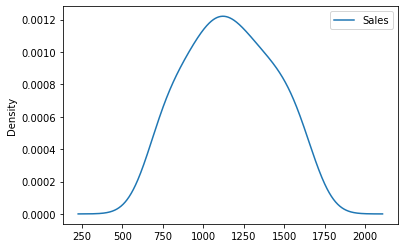

In [5]:
series.plot(kind='kde')

In [6]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 50, Validation 10


In [7]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float64')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [8]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=896.000, Expected=793.000
>Predicted=793.000, Expected=885.000
>Predicted=885.000, Expected=1055.000
>Predicted=1055.000, Expected=1204.000
>Predicted=1204.000, Expected=1326.000
>Predicted=1326.000, Expected=1303.000
>Predicted=1303.000, Expected=1436.000
>Predicted=1436.000, Expected=1473.000
>Predicted=1473.000, Expected=1453.000
>Predicted=1453.000, Expected=1170.000
>Predicted=1170.000, Expected=1023.000
>Predicted=1023.000, Expected=951.000
>Predicted=951.000, Expected=861.000
>Predicted=861.000, Expected=938.000
>Predicted=938.000, Expected=1109.000
>Predicted=1109.000, Expected=1274.000
>Predicted=1274.000, Expected=1422.000
>Predicted=1422.000, Expected=1486.000
>Predicted=1486.000, Expected=1555.000
>Predicted=1555.000, Expected=1604.000
>Predicted=1604.000, Expected=1600.000
>Predicted=1600.000, Expected=1403.000
>Predicted=1403.000, Expected=1209.000
>Predicted=1209.000, Expected=1030.000
>Predicted=1030.000, Expected=1032.000
RMSE: 130.244


In [9]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [11]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


### Build Model based on the optimized values

In [12]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float64')

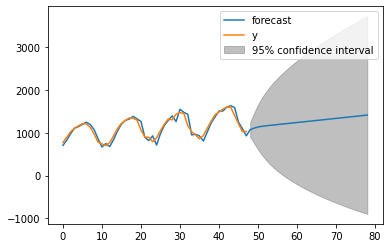

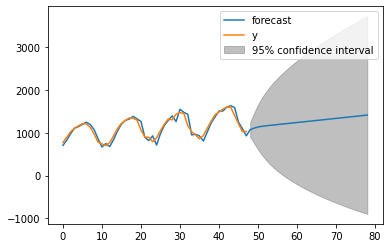

In [13]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [14]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

313.3499033916773

In [15]:
# fit model
data = read_csv(r'C:\Users\lenovo\Desktop\ExcelR\CSV files\water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [16]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

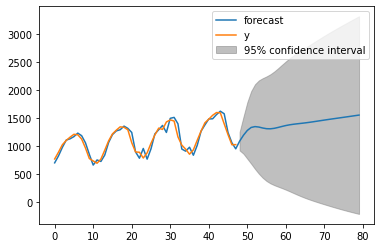

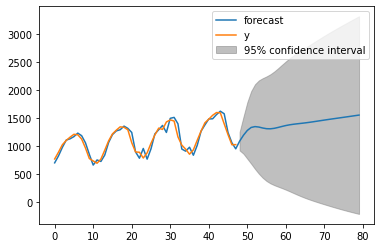

In [17]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [18]:
forecast

array([1092.72563138, 1198.9006901 , 1284.54017999, 1338.29549873,
       1353.4939475 , 1345.32845513, 1328.3648009 , 1316.03832915,
       1314.11180325, 1322.80985904])